In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def open_ex(number1, number2):
    return pd.read_excel('maorg'+str(number1)+'-'+str(number2)+'.xlsm', skiprows=7, na_values = '-')

In [3]:
def concat(number_of_package):
    concat_list = []
    for i in range(1,7):
        concat_list.append(open_ex(number_of_package, i))
    df = pd.concat(concat_list).reset_index(drop = True)
    if number_of_package == 2 or number_of_package == 1:
        return df
    else:
        return df[pd.notnull(df['Security Tickers [Buyers/Investors]'])].reset_index(drop = True)

In [4]:
def get_ticker(df):
    first_step = pd.DataFrame(df['Security Tickers [Buyers/Investors]'].str.split(':').tolist())[1]
    first_step_0 = pd.DataFrame(df['Security Tickers [Buyers/Investors]'].str.split(':').tolist())[0]
    df['Security Tickers [Buyers/Investors]'] = first_step + df['All Transactions Announced Date'].astype(str)
    df['Security Tickers [Buyers/Investors] without date'] = first_step
    df['Primary exchange'] = first_step_0
    return df

In [5]:
first = concat(1)
first.shape

(51802, 15)

In [6]:
second = concat(2)
second.shape

(51802, 31)

In [7]:
#first = pd.concat([first, second.drop('All Transactions Announced Date', axis = 1)], axis = 1)
#first.shape

In [8]:
first = first[pd.notnull(first['Security Tickers [Buyers/Investors]'])].reset_index(drop = True)
first = get_ticker(first)
first.shape

(44263, 17)

In [9]:
third = concat(3)
third = get_ticker(third)
third.shape

(44368, 62)

In [10]:
fourth = concat(4)
fourth = get_ticker(fourth)
fourth.shape

(44368, 91)

In [11]:
fifth = concat(5)
fifth = get_ticker(fifth)
fifth.shape

(44368, 91)

In [12]:
sixth = concat(6)
sixth = get_ticker(sixth)
sixth.shape

(44257, 91)

In [13]:
seventh = concat(7)
seventh = get_ticker(seventh)
seventh.shape

(44246, 91)

In [14]:
eighth = concat(8)
eighth = get_ticker(eighth)
eighth.shape

(44243, 88)

In [15]:
ninth = concat(9)
ninth = get_ticker(ninth)
ninth.shape

(44243, 89)

In [16]:
tenth = concat(10)
tenth = get_ticker(tenth)
tenth.shape

(44247, 88)

In [17]:
eleventh = concat(11)
eleventh = get_ticker(eleventh)
eleventh.shape

(44247, 88)

In [18]:
tech_df = pd.concat([pd.read_excel('maorg_please.xlsm', skiprows=7, na_values = '-'), pd.read_excel('maorg_please2.xlsm', skiprows=7, na_values = '-')])
tech_df.shape

(15725, 61)

In [19]:
tech_df = tech_df[pd.notnull(tech_df['Security Tickers [Buyers/Investors]'])].reset_index(drop = True)
tech_df = get_ticker(tech_df)
tech_df.shape

(13164, 63)

In [20]:
second.columns

Index(['All Transactions Announced Date',
       'Industry Classifications [Target/Issuer]',
       'Total Revenue [FY 1990] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1991] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1992] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1993] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1994] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1995] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1996] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1997] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1998] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 1999] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 2000] ($USDmm, Historical rate) [Buyers/Investors]',
       'Total Revenue [FY 2001] ($USDm

In [21]:
def here_and_there(df_bad):
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(tech_df['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(first['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(third['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(fourth['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(fifth['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(sixth['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(seventh['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(eighth['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(ninth['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(tenth['Security Tickers [Buyers/Investors]'])]
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(eleventh['Security Tickers [Buyers/Investors]'])]
    return(df_bad)

In [22]:
def stay_with_me(df_bad, df_good):
    df_bad = df_bad.loc[df_bad['Security Tickers [Buyers/Investors]'].isin(df_good['Security Tickers [Buyers/Investors]'])]
    return(df_bad)

In [23]:
first = here_and_there(first).reset_index(drop = True)
first = first.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
first = first.iloc[first['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
first = first.reset_index(drop = True)
first.shape

(12531, 17)

In [24]:
third = here_and_there(third).reset_index(drop = True)
third = third.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
third = third.iloc[third['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
third = third.reset_index(drop = True)
third.shape

(12531, 62)

In [25]:
fourth = here_and_there(fourth).reset_index(drop = True)
fourth = fourth.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
fourth = fourth.iloc[fourth['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
fourth = fourth.reset_index(drop = True)
fourth.shape

(12531, 91)

In [26]:
fifth = here_and_there(fifth).reset_index(drop = True)
fifth = fifth.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
fifth = fifth.iloc[fifth['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
fifth = fifth.reset_index(drop = True)
fifth.shape

(12531, 91)

In [27]:
sixth = here_and_there(sixth).reset_index(drop = True)
sixth = sixth.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
sixth = sixth.iloc[sixth['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
sixth = sixth.reset_index(drop = True)
sixth.shape

(12531, 91)

In [28]:
seventh = here_and_there(seventh).reset_index(drop = True)
seventh = seventh.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
seventh = seventh.iloc[seventh['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
seventh = seventh.reset_index(drop = True)
seventh.shape

(12531, 91)

In [29]:
eighth = here_and_there(eighth).reset_index(drop = True)
eighth = eighth.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
eighth = eighth.iloc[eighth['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
eighth = eighth.reset_index(drop = True)
eighth.shape

(12531, 88)

In [30]:
ninth = here_and_there(ninth).reset_index(drop = True)
ninth = ninth.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
ninth = ninth.iloc[ninth['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
ninth = ninth.reset_index(drop = True)
ninth.shape

(12531, 89)

In [31]:
tenth = here_and_there(tenth).reset_index(drop = True)
tenth = tenth.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
tenth = tenth.iloc[tenth['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
tenth = tenth.reset_index(drop = True)
tenth.shape

(12531, 88)

In [32]:
eleventh = here_and_there(eleventh).reset_index(drop = True)
eleventh = eleventh.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
eleventh = eleventh.iloc[eleventh['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
eleventh = eleventh.reset_index(drop = True)
eleventh.shape

(12531, 88)

In [33]:
tech_df = here_and_there(tech_df).reset_index(drop = True)
tech_df = tech_df.sort_values(by = ['Security Tickers [Buyers/Investors]']).reset_index(drop = True)
tech_df = tech_df.iloc[tech_df['Security Tickers [Buyers/Investors]'].drop_duplicates().index]
tech_df = tech_df.reset_index(drop = True)
tech_df = tech_df.drop('Buyers/Investors', axis = 1)
tech_df.shape

(12531, 62)

In [34]:
#checku = eleventh['Security Tickers [Buyers/Investors]'].drop_duplicates()
#checka = tech_df['Security Tickers [Buyers/Investors]'].drop_duplicates()
#checku[~checku.isin(checka)]

In [35]:
def check_date(g1, g3):
    group11 = here_and_there(g3).groupby('All Transactions Announced Date').count()['Security Tickers [Buyers/Investors]'][::-1]
    group_1 = here_and_there(g1).groupby('All Transactions Announced Date').count()['Security Tickers [Buyers/Investors]'][::-1]
    dates = []
    for i in range(len(group11)):
        if i < len(group_1):
            if group11.index[i] == group11.index[i]:
                if group11[i] != group_1[i]:
                    dates.append(group11.index[i])
                    print(group11.index[i], group11[i], group_1[i], group_1.index[i])

In [36]:
final_df = pd.concat([first,\
                      third.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      fourth.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      fifth.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      sixth.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      seventh.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      eighth.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      ninth.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      tenth.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                      eleventh.drop('Security Tickers [Buyers/Investors] without date', axis = 1),\
                     tech_df.drop('Security Tickers [Buyers/Investors] without date', axis = 1)], axis = 1)

In [37]:
final_df['M&A year'] = final_df['M&A Announced Date'].dt.year

(array([  2.,   5.,  14.,  12.,  35.,  44.,  40.,  78., 374., 627., 686.,
        505., 377., 467., 550., 671., 708., 719., 609., 476., 684., 731.,
        676., 646., 808., 755., 666., 565.,   1.]),
 array([1990.        , 1990.96551724, 1991.93103448, 1992.89655172,
        1993.86206897, 1994.82758621, 1995.79310345, 1996.75862069,
        1997.72413793, 1998.68965517, 1999.65517241, 2000.62068966,
        2001.5862069 , 2002.55172414, 2003.51724138, 2004.48275862,
        2005.44827586, 2006.4137931 , 2007.37931034, 2008.34482759,
        2009.31034483, 2010.27586207, 2011.24137931, 2012.20689655,
        2013.17241379, 2014.13793103, 2015.10344828, 2016.06896552,
        2017.03448276, 2018.        ]),
 <a list of 29 Patch objects>)

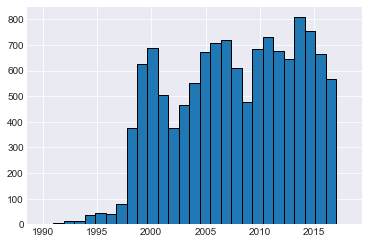

In [38]:
plt.style.use('seaborn-darkgrid')
years = final_df['M&A year']
#final_df[pd.isnull(final_df['M&A Announced Date'])]['Security Tickers [Buyers/Investors]']
plt.hist(years, histtype='bar', ec='black', bins = 29)

In [39]:
len(final_df['Security Tickers [Buyers/Investors] without date'].unique())

2207

In [40]:
final_df = final_df[final_df['M&A year'].isin(np.arange(2008, 2018))].reset_index(drop = True)

(array([609., 476., 684., 731., 676., 646., 808., 755., 666., 565.]),
 array([2008. , 2008.9, 2009.8, 2010.7, 2011.6, 2012.5, 2013.4, 2014.3,
        2015.2, 2016.1, 2017. ]),
 <a list of 10 Patch objects>)

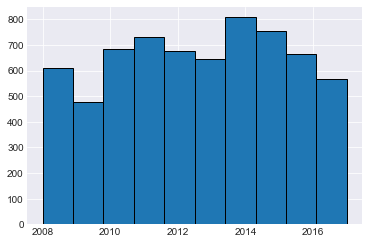

In [41]:
plt.style.use('seaborn-darkgrid')
years = final_df['M&A year']
#final_df[pd.isnull(final_df['M&A Announced Date'])]['Security Tickers [Buyers/Investors]']
plt.hist(years, histtype='bar', ec='black', bins = 10)

In [42]:
final_df['M&A year'].unique()

array([2015, 2016, 2017, 2013, 2014, 2008, 2009, 2010, 2011, 2012])

In [43]:
for i in range(1992, 2019):
    final_df.loc[pd.isnull(final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Target/Issuer]']),\
                'Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Target/Issuer]'] = \
    final_df[pd.isnull(final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Target/Issuer]'])]\
    ['Total Assets [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Target/Issuer]']

In [44]:
len(final_df['Security Tickers [Buyers/Investors] without date'].unique())

1661

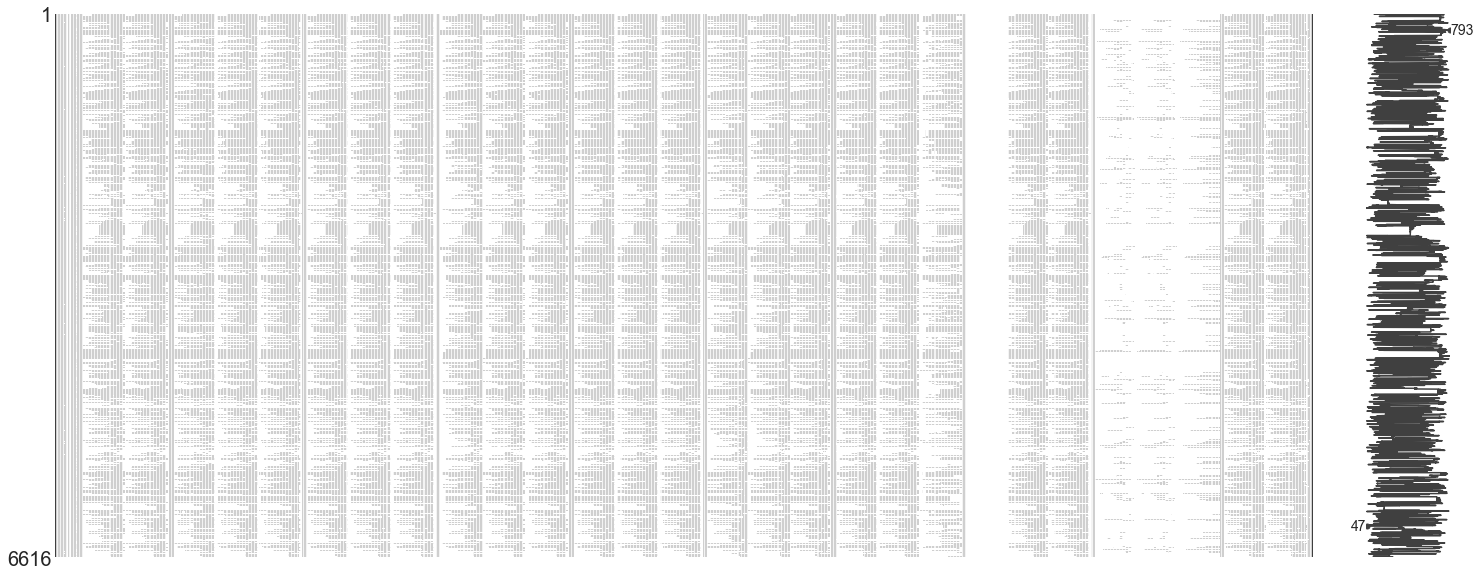

In [45]:
import missingno as msno
%matplotlib inline
msno.matrix(final_df)

In [46]:
def year_extract(year, df):    
    columns_year = []
    for i in df.columns:
        if str(year) in i:
            columns_year.append(i)
    return columns_year

In [47]:
extract_columns = []
for i in range(1990, 2006):
    extract_columns.extend(year_extract(i, final_df))

In [48]:
final_df = final_df.drop(extract_columns, axis = 1).reset_index(drop = True)

In [49]:
len(final_df['Buyers/Investors'].unique())

1695

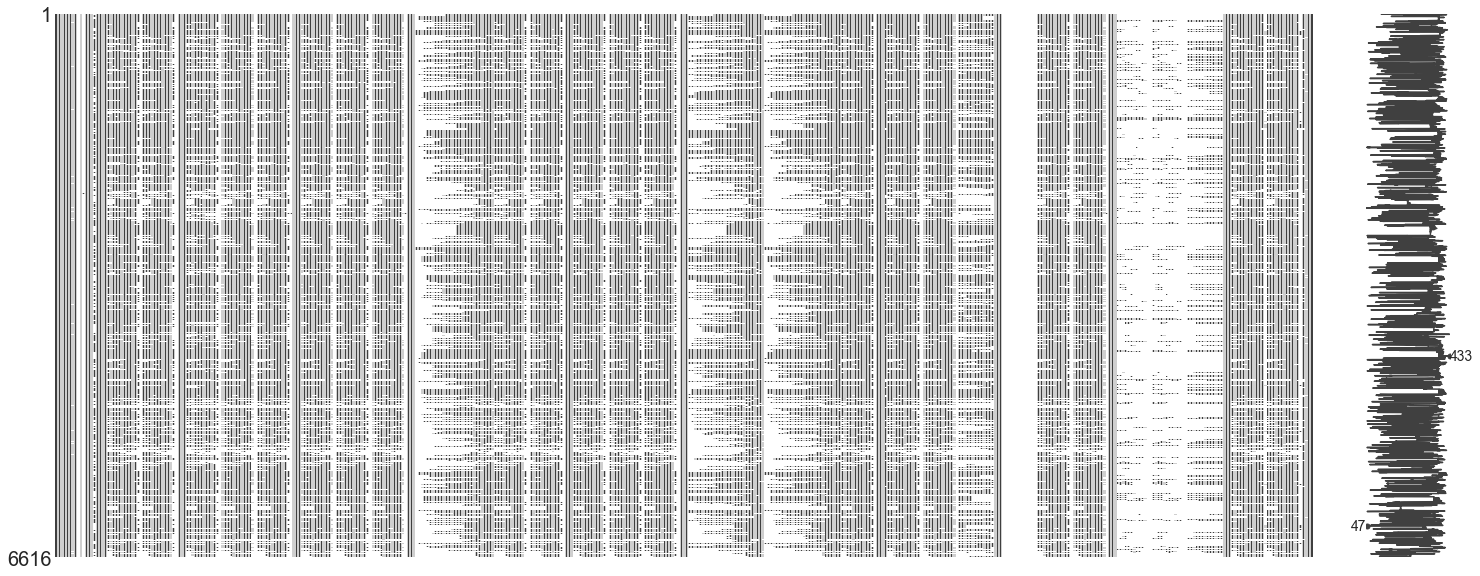

In [50]:
import missingno as msno
%matplotlib inline
msno.matrix(final_df.drop(extract_columns, axis = 1))

In [51]:
for i in final_df.columns:
    if 'Assets' in i:
        print(i)

Total Assets [FY 2006] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2007] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2010] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2011] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2012] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2013] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2014] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2015] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2016] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2017] ($USDmm, Historical rate) [Buyers/Investors]
Total Assets [FY 2018] ($USDmm, Historical rate) [Buyers/Investors]
Return on Assets % [FY 2006] [Buyers/Investors]
Return on Assets % [FY 2007] [Buyers/Investors]
Return on Assets % [

In [52]:
def find_all_here(text, value):    
    return [n for n in range(len(text)) if text.find(value, n) == n]

In [53]:
def row_to_flow(iloc_fig):
    indexes = []
    figures = []
    a = 0
    for i in final_df.iloc[iloc_fig]:
        if type(i) == str and ')' in i:
            if ')' in i:
                    try:
                        indi_left = find_all_here(i, '(')
                        indi_right = find_all_here(i, ')')
                        sum_fig = 0
                        for j in range(len(indi_left)):
                            try:
                                sum_fig += float(i[indi_left[j]+1:indi_right[j]].replace(',', ''))
                                
                            except ValueError:
                                pass
                        figures.append(sum_fig)
                        indexes.append(a)
                        a += 1
                    except ValueError:
                        a += 1
                        pass
            else:
                    a += 1
        else:
            a += 1
    return [indexes, figures]

In [54]:
def convert_row(figures, indexes, row_n):
    lisi = list(final_df.iloc[row_n])
    b = 0
    for i in indexes:
        lisi[i] = figures[b]
        b += 1
    final_df.loc[row_n, :] = lisi

In [55]:
def find_index(column_name):
    a = 0
    list_of_errors = []
    for i in final_df[column_name]:
        try:
            float(i)
            a += 1
        except ValueError:
            list_of_errors.append(a)
            a += 1
    return(list_of_errors)

In [56]:
list_of_errors = find_index('Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]')
list_of_errors

[0,
 5,
 6,
 7,
 10,
 11,
 12,
 13,
 124,
 439,
 502,
 568,
 734,
 766,
 836,
 837,
 1085,
 1172,
 2040,
 2047,
 2082,
 2158,
 2159,
 2331,
 2422,
 2438,
 2446,
 2522,
 2724,
 2790,
 2813,
 2893,
 3048,
 3054,
 3167,
 3402,
 3513,
 3595,
 3669,
 3687,
 3893,
 3901,
 3952,
 3996,
 4164,
 5032,
 5280,
 5557,
 5754,
 5755,
 5777,
 5781,
 5803,
 5844,
 6149,
 6157,
 6260,
 6319,
 6429,
 6545]

In [57]:
for i in list_of_errors:
    indexes = row_to_flow(i)[0]
    figures = row_to_flow(i)[1]
    convert_row(figures, indexes, i)

In [58]:
list_of_errors = find_index('Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]')
list_of_errors

[]

In [59]:
list_of_errors = find_index('Total Assets [FY 2015] ($USDmm, Historical rate) [Buyers/Investors]')
list_of_errors

[2213, 3280, 3973, 4337, 5873]

In [60]:
for i in list_of_errors:
    indexes = row_to_flow(i)[0]
    figures = row_to_flow(i)[1]
    convert_row(figures, indexes, i)

In [61]:
list_of_errors = find_index('Total Assets [FY 2015] ($USDmm, Historical rate) [Buyers/Investors]')
list_of_errors

[]

In [62]:
list_of_errors = find_index('Total Revenue [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]')
list_of_errors

[6212]

In [63]:
for i in list_of_errors:
    indexes = row_to_flow(i)[0]
    figures = row_to_flow(i)[1]
    convert_row(figures, indexes, i)

In [64]:
list_of_errors = find_index('Total Revenue [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]')
list_of_errors

[]

In [65]:
final_df['Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]'] = final_df['Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]'].astype(float)

In [66]:
final_df['Total Assets [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]'] = final_df['Total Assets [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]'].astype(float)

In [67]:
final_df['Total Assets [FY 2009] ($USDmm, Historical rate) [Buyers/Investors]']/final_df['Total Assets [FY 2008] ($USDmm, Historical rate) [Buyers/Investors]']

0       1.326009
1            NaN
2            NaN
3            NaN
4            NaN
5       1.040867
6       1.576444
7       1.066569
8       0.921951
9       0.921951
10      1.775239
11      1.203627
12      0.994375
13      1.003401
14      1.086342
15      1.086342
16      1.086342
17      1.086342
18      1.086342
19      1.086342
20      1.086342
21      1.086342
22      1.086342
23      1.086342
24      1.086342
25      1.086342
26      1.086342
27      1.086342
28      1.086342
29      1.086342
          ...   
6586         NaN
6587         NaN
6588         NaN
6589         NaN
6590         NaN
6591         NaN
6592         NaN
6593         NaN
6594         NaN
6595         NaN
6596         NaN
6597         NaN
6598         NaN
6599         NaN
6600         NaN
6601         NaN
6602         NaN
6603         NaN
6604         NaN
6605         NaN
6606         NaN
6607         NaN
6608         NaN
6609         NaN
6610         NaN
6611         NaN
6612         NaN
6613         N

In [68]:
from sympy import *
x = Symbol('x')
solve(2000*x + 1000*x**12 - 4000, x)

[CRootOf(x**12 + 2*x - 4, 0),
 CRootOf(x**12 + 2*x - 4, 1),
 CRootOf(x**12 + 2*x - 4, 2),
 CRootOf(x**12 + 2*x - 4, 3),
 CRootOf(x**12 + 2*x - 4, 4),
 CRootOf(x**12 + 2*x - 4, 5),
 CRootOf(x**12 + 2*x - 4, 6),
 CRootOf(x**12 + 2*x - 4, 7),
 CRootOf(x**12 + 2*x - 4, 8),
 CRootOf(x**12 + 2*x - 4, 9),
 CRootOf(x**12 + 2*x - 4, 10),
 CRootOf(x**12 + 2*x - 4, 11)]

In [69]:
from sympy.solvers import solve
from sympy import Symbol, N

In [70]:
final_df['tau'] = final_df['M&A Announced Date'].dt.month

In [71]:
final_df['tau'] = abs(final_df['tau']-13)/12

## Controls (first part)

Average company size (assets)

In [72]:
for i in range(2008, 2018):
    assets_0 = final_df['Total Assets [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_1 = final_df['Total Assets [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_2 = final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_i = (assets_0 + assets_1 + assets_2)/3
    final_df['Company Size [FY ' + str(i) + '] assets'] = assets_i.apply(np.log)
    final_df['Company Size [FY ' + str(i) + '] assets'] = final_df['Company Size [FY ' + str(i) + '] assets'].replace(-np.inf, np.float('nan'))
    final_df['log(Assets) [FY ' + str(i) + ']'] = assets_2.apply(np.log)
    final_df['log(Assets) [FY ' + str(i) + ']'] = final_df['log(Assets) [FY ' + str(i) + ']'].replace(-np.inf, np.float('nan'))

Average company size (Total revenue)

In [73]:
for i in range(2008, 2018):
    revenue_0 = final_df['Total Revenue [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    revenue_1 = final_df['Total Revenue [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    revenue_2 = final_df['Total Revenue [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    revenue_i = (revenue_0 + revenue_1 + revenue_2)/3
    final_df['Company Size [FY ' + str(i) + '] revenue'] = revenue_i.apply(np.log)
    final_df['Company Size [FY ' + str(i) + '] revenue'] = final_df['Company Size [FY ' + str(i) + '] revenue'].replace(-np.inf, np.float('nan'))
    final_df['log(Revenue) [FY ' + str(i) + ']'] = revenue_2.apply(np.log)
    final_df['log(Revenue) [FY ' + str(i) + ']'] = final_df['log(Revenue) [FY ' + str(i) + ']'].replace(-np.inf, np.float('nan'))

Average Leverage

In [74]:
for i in range(2008, 2018):
    equity_0 = final_df['Total Common Equity [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    equity_1 = final_df['Total Common Equity [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    equity_2 = final_df['Total Common Equity [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    debt_0 = final_df['Total Debt [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    debt_1 = final_df['Total Debt [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    debt_2 = final_df['Total Debt [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    DE_0 = debt_0/equity_0
    DE_1 = debt_1/equity_1
    DE_2 = debt_2/equity_2
    DE_i = (DE_0 + DE_1 + DE_2)/3
    final_df['Average Leverage [FY ' + str(i) + ']'] = DE_i.apply(np.log)
    final_df['Average Leverage [FY ' + str(i) + ']'] = final_df['Average Leverage [FY ' + str(i) + ']'].replace(-np.inf, np.float('nan'))
    final_df['Average Leverage [FY ' + str(i) + ']'] = final_df['Average Leverage [FY ' + str(i) + ']'].replace(np.inf, np.float('nan'))
    final_df['Log Leverage [FY ' + str(i) + ']'] = DE_2.apply(np.log)
    final_df['Log Leverage [FY ' + str(i) + ']'] = final_df['Log Leverage [FY ' + str(i) + ']'].replace(-np.inf, np.float('nan'))
    final_df['Log Leverage [FY ' + str(i) + ']'] = final_df['Log Leverage [FY ' + str(i) + ']'].replace(np.inf, np.float('nan'))
    final_df['Leverage [FY ' + str(i) + ']'] = DE_2
    final_df['Leverage [FY ' + str(i) + ']'] = final_df['Leverage [FY ' + str(i) + ']'].replace(0, np.float('nan'))
    final_df['Leverage [FY ' + str(i) + ']'] = final_df['Leverage [FY ' + str(i) + ']'].replace(np.inf, np.float('nan'))

Average Margin (Capital IQ)

In [75]:
for i in range(2008, 2018):
    final_df['Net Income Margin % [FY ' + str(i) + '] [Buyers/Investors]'] = final_df['Net Income Margin % [FY ' + str(i) + '] [Buyers/Investors]']/100

In [76]:
for i in range(2008, 2018):
    margin_0 = final_df['Net Income Margin % [FY ' + str(i-2) + '] [Buyers/Investors]'].fillna(0)
    margin_1 = final_df['Net Income Margin % [FY ' + str(i-1) + '] [Buyers/Investors]'].fillna(0)
    margin_2 = final_df['Net Income Margin % [FY ' + str(i) + '] [Buyers/Investors]'].fillna(0)
    margin_i = (margin_0 + margin_1 + margin_2)/3
    final_df['average margin [FY ' + str(i) + '] Capital IQ'] = margin_i
    final_df['average margin [FY ' + str(i) + '] Capital IQ'] = final_df['average margin [FY ' + str(i) + '] Capital IQ'].replace(0, np.float('nan'))
    

Average Margin (by Kras)

In [77]:
for i in range(2008, 2018):
    revenue_0 = final_df['Total Revenue [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    revenue_1 = final_df['Total Revenue [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    revenue_2 = final_df['Total Revenue [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    NI_0 = final_df['Net Income [FY ' + str(i-2) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    NI_1 = final_df['Net Income [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    NI_2 = final_df['Net Income [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    margin_i = (NI_2/revenue_2 + NI_1/revenue_1 + NI_2/revenue_2)/3
    final_df['average margin [FY ' + str(i) + '] by Kras'] = margin_i
    final_df['average margin [FY ' + str(i) + '] by Kras'] = final_df['average margin [FY ' + str(i) + '] by Kras'].replace(0, np.float('nan'))
    final_df['average margin [FY ' + str(i) + '] by Kras'] = final_df['average margin [FY ' + str(i) + '] by Kras'].replace(-np.inf, np.float('nan'))
    final_df['average margin [FY ' + str(i) + '] by Kras'] = final_df['average margin [FY ' + str(i) + '] by Kras'].replace(np.inf, np.float('nan'))
    final_df['Net Income Margin [FY ' + str(i) + '] by Kras'] = NI_2/revenue_2
    final_df['Net Income Margin [FY ' + str(i) + '] by Kras'] = final_df['Net Income Margin [FY ' + str(i) + '] by Kras'].replace(0, np.float('nan'))
    final_df['Net Income Margin [FY ' + str(i) + '] by Kras'] = final_df['Net Income Margin [FY ' + str(i) + '] by Kras'].replace(-np.inf, np.float('nan'))
    final_df['Net Income Margin [FY ' + str(i) + '] by Kras'] = final_df['Net Income Margin [FY ' + str(i) + '] by Kras'].replace(np.inf, np.float('nan'))

In [99]:
len(final_df)

6608

Industry dummy

In [78]:
industry_list = []
a = 0
drop_list = []
for i in final_df['Industry Classifications [Buyers/Investors]']:
    if str(type(i)) == "<class 'float'>" or i == 0:
        industry_list.append(float('nan'))
    elif 'Information Technology' in i:
        industry_list.append('IT industry')
    elif 'Healthcare' in i:
        industry_list.append('Healthcare industry')
    elif ('Aerospace' in i) or ('Defense' in i):
        industry_list.append('Aerospace industry')
    elif 'Telecommunication' in i:
        industry_list.append('Telecommunications industry')
    elif ('Pharmaceuticals' in i) or ('Biotechnology' in i) or ('Life Sciences' in i):
        industry_list.append('Pharma industry')
    else:
        drop_list.append(a)
    a += 1
final_df = final_df.drop(drop_list).reset_index(drop = True)
len(final_df)

6608

In [79]:
final_df['For industry dummies'] = industry_list

In [80]:
final_df = pd.concat([final_df, pd.get_dummies(final_df['For industry dummies'])], axis = 1)

In [81]:
industry_list_target = []
a = 0
for i in final_df['Industry Classifications [Target/Issuer]']:
    if str(type(i)) == "<class 'float'>" or i == 0:
        industry_list_target.append(float('nan'))
    elif 'Information Technology' in i:
        industry_list_target.append('IT industry target')
    elif 'Healthcare' in i:
        industry_list_target.append('Healthcare industry target')
    elif ('Aerospace' in i) or ('Defense' in i):
        industry_list_target.append('Aerospace industry target')
    elif 'Telecommunication' in i:
        industry_list_target.append('Telecommunications industry target')
    elif ('Pharmaceuticals' in i) or ('Biotechnology' in i) or ('Life Sciences' in i):
        industry_list_target.append('Pharma industry target')
    else:
        industry_list_target.append('Other industry target')
        a += 1
a

875

In [82]:
final_df['For industry dummies target'] = industry_list_target

In [83]:
final_df = pd.concat([final_df, pd.get_dummies(final_df['For industry dummies target'])], axis = 1)

__Overall growth__

In [84]:
for i in range(2008, 2018):
    assets_0 = final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    assets_1 = final_df['Total Assets [FY ' + str(i+1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].fillna(0)
    final_df['Overall growth [FY ' + str(i) + ']'] = assets_1.divide(assets_0) - 1
    final_df['Overall growth [FY ' + str(i) + ']'] = final_df['Overall growth [FY ' + str(i) + ']'].replace(-np.inf, np.float('nan'))
    final_df['Overall growth [FY ' + str(i) + ']'] = final_df['Overall growth [FY ' + str(i) + ']'].replace(np.inf, np.float('nan'))

## Data import

In [95]:
final_2 = pd.read_excel('final_df_2.0.xlsx')

In [96]:
def create_year_files(year):
    writer = pd.ExcelWriter('final_df '+ str(year) + '.xlsx')
    yourdf = final_2[final_2['M&A year'] == year]
    yourdf.to_excel(writer,'Sheet5')
    writer.save()

In [97]:
for i in range(2008, 2018):
    create_year_files(i)

In [88]:
writer = pd.ExcelWriter('final_df.xlsx')
final_df.to_excel(writer,'Sheet5')
writer.save()

In [89]:
len(final_df['Security Tickers [Buyers/Investors] without date'].unique())

1658

In [90]:
final_df['Return on Equity % [FY 2015] [Buyers/Investors]'].max()

1459468.2

In [91]:
writer = pd.ExcelWriter('for_q_and_eva.xlsx')
final_df[['Primary exchange', 'Security Tickers [Buyers/Investors] without date', 'Buyers/Investors']].to_excel(writer,'Sheet')
writer.save()

# END

In [ ]:
len(final_df['Telecommunications industry'])

In [ ]:
margin_0 = final_df['Net Income Margin % [FY ' + str(2015) + '] [Buyers/Investors]'].fillna(0)/100
margin_1 = final_df['Net Income Margin % [FY ' + str(2016) + '] [Buyers/Investors]'].fillna(0)/100
margin_2 = final_df['Net Income Margin % [FY ' + str(2017) + '] [Buyers/Investors]'].fillna(0)/100
margin_i = (margin_0 + margin_1 + margin_2)/3
final_df['average margin [FY' + str(i) + ']'] = margin_i.apply(np.log)

In [ ]:
len(final_df['Industry Classifications [Buyers/Investors]'])

In [ ]:
final_df = final_df.drop(drop_list).reset_index(drop = True)

In [ ]:
len(industry_list)

In [ ]:
len(final_df)

In [ ]:
list_of_asset_columns = [] 
for i in final_df.columns:
    if 'Total Assets' in i and 'Buyers' in i:
        list_of_asset_columns.append(i)

In [ ]:
internal_growth_2008

In [168]:
for i in range(2009, 2019):
    print(i)

2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [169]:
float(nan)

nan

In [170]:
df_year = final_df[final_df['M&A year'] == 2008].fillna(0)

In [171]:
len(df_year)

627

In [172]:
final_df.groupby('Buyers/Investors').count()

,All Transactions Announced Date,Security Tickers [Buyers/Investors],Company Type [Buyers/Investors],Industry Classifications [Buyers/Investors],Geographic Locations [Buyers/Investors],"Market Capitalization [My Setting] [Latest] ($USDmm, Historical rate) [Buyers/Investors]",Target/Issuer,Exchange:Ticker,Company Type [Target/Issuer],"Market Capitalization [My Setting] [Latest] ($USDmm, Historical rate) [Target/Issuer]",...,"Total Assets [FY 2011] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2012] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2013] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2014] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2015] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2016] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2017] ($USDmm, Historical rate) [Target/Issuer]","Total Assets [FY 2018] ($USDmm, Historical rate) [Target/Issuer]",tau,M&A year
Buyers/Investors,,,,,,,,,,,,,,,,,,,,,
0,67,67,67,67,67,66,67,5,67,5,...,17,20,20,20,20,20,20,20,67,67
"24/7 Kid Doc, Inc. (OTCPK:TVMD)",1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
"30DC, Inc. (OTCPK:TDCH)",2,2,2,2,2,2,2,0,2,0,...,1,1,1,1,1,1,1,1,2,2
"3D Eye Solutions, Inc. (OTCPK:TDEY)",2,2,2,2,2,2,2,0,2,0,...,1,1,1,1,1,1,1,1,2,2
"3D MakerJet, Inc. (OTCPK:MRJT)",1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3D Systems Corporation (NYSE:DDD),39,39,39,39,39,39,39,0,39,0,...,6,6,6,6,6,6,6,6,39,39
"3Pea International, Inc (OTCPK:TPNL)",1,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
"4Cable TV International, Inc. (OTCPK:CATV)",1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
"5BARz International, Inc. (OTCPK:BARZ)",1,1,1,1,1,1,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
final_df[final_df['Buyers/Investors'] == '3D Systems Corporation (NYSE:DDD)']

In [ ]:
for i in range(2008, 2018):
    founded = final_df['Year Founded [Buyers/Investors].1']
    year = final_df['M&A year']
    firm_age = year - founded
    final_df['Firm Age [FY' + str(i) + ']'] = firm_age

In [ ]:
R2 = solve(7000*x**12 + 1200*x + 1500*x**4 - 10000,x)
real_answer = 0
for solution in R2:
    if 'I' not in str(N(solution)) and N(solution) >= 0:
        real_answer = (N(solution))**12-1

In [ ]:
real_answer

In [ ]:
real_answer

In [ ]:
a = 0
b = 0
for i in range(2008, 2019):
    a += len(final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'])-final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].count()
    b += len(final_df['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'])
a/b

In [ ]:
len(final_df.groupby('Security Tickers [Buyers/Investors] without date').mean())

In [ ]:
final_df.columns

In [ ]:
d

In [159]:
def solve_dofiga(TAt1, TAt0, ta, tau):
    real_answer = 0
    x = Symbol('x')
    if TAt1 ==0 and TAt0 ==0:
            if ta == 0:
                real_answer == float(nan)
    elif tau == 1/12:
        R2 = solve(TAt0*x**12 + ta*x - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**12-1
            else:
                real_answer = float(nan)
    elif tau == 1/6:
        R2 = solve(TAt0*x**6 + ta*x - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**6-1
            else:
                real_answer = float(nan)
    elif tau == 1/4:
        R2 = solve(TAt0*x**4 + ta*x - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**4-1
            else:
                real_answer = float(nan)
    elif tau == 1/3:
        R2 = solve(TAt0*x**3 + ta*x - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**3-1
    elif tau == 5/12:
        R2 = solve(TAt0*x**12 + ta*x**5 - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = N(solution)**12-1
            else:
                real_answer = float(nan)
    elif tau == 1/2:
        R2 = solve(TAt0*x**2 + ta*x - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**2-1
            else:
                real_answer = float(nan)
    elif tau == 7/12:
        R2 = solve(TAt0*x**12 + ta*x**7 - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**12-1
            else:
                real_answer = float(nan)
    elif tau == 2/3:
        R2 = solve(TAt0*x**3 + ta*x**2 - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**3-1
            else:
                real_answer = float(nan)
    elif tau == 3/4:
        R2 = solve(TAt0*x**4 + ta*x**3 - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**4-1
            else:
                real_answer = float(nan)
    elif tau == 5/6:
        R2 = solve(TAt0*x**6 + ta*x**5 - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**6-1
            else:
                real_answer = float(nan)
    elif tau == 11/12:
        R2 = solve(TAt0*x**12 + ta*x**11 - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = (N(solution))**12-1
            else:
                real_answer = float(nan)
    elif tau == 12/12:
        R2 = solve(TAt0*x + ta*x - TAt1,x)
        for solution in R2:
            if 'I' not in str(N(solution)) and N(solution) >= 0:
                real_answer = N(solution)
            else:
                real_answer = float(nan)
    return real_answer

In [166]:
internal_growth_2008 = []
internal_growth_2009 = []
internal_growth_2010 = []
internal_growth_2011 = []
internal_growth_2012 = []
internal_growth_2013 = []
internal_growth_2014 = []
internal_growth_2015 = []
internal_growth_2016 = []
internal_growth_2017 = []
for i in reversed(range(2009, 2019)):
    print(i)
    df_year = final_df[final_df['M&A year'] == i-1].fillna(0)
    TAt1 = list(df_year['Total Assets [FY ' + str(i) + '] ($USDmm, Historical rate) [Buyers/Investors]'].astype(float))
    TAt0 = list(df_year['Total Assets [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Buyers/Investors]'].astype(float))
    ta = list(df_year['Total Assets [FY ' + str(i-1) + '] ($USDmm, Historical rate) [Target/Issuer]'].astype(float))
    tau = list(df_year['tau'])
    for j in range(len(df_year)):
        if i == 2009:
            internal_growth_2008.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2010:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2011:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2012:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2013:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2009:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2014:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2015:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(float(nan))
        elif i == 2016:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))
            internal_growth_2017.append(float(nan))
        elif i == 2017:
            internal_growth_2008.append(float(nan))
            internal_growth_2009.append(float(nan))
            internal_growth_2010.append(float(nan))
            internal_growth_2011.append(float(nan))
            internal_growth_2012.append(float(nan))
            internal_growth_2013.append(float(nan))
            internal_growth_2014.append(float(nan))
            internal_growth_2015.append(float(nan))
            internal_growth_2016.append(float(nan))
            internal_growth_2017.append(solve_dofiga(TAt1[j], TAt0[j], ta[j], tau[j]))

2018
2017
2016
2015


KeyboardInterrupt: 

In [94]:
 final_df['IT industry target']

0       0
1       1
2       0
3       1
4       1
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      0
22      0
23      0
24      0
25      1
26      1
27      0
28      0
29      0
       ..
6578    1
6579    1
6580    0
6581    1
6582    1
6583    1
6584    1
6585    1
6586    0
6587    1
6588    1
6589    1
6590    1
6591    0
6592    0
6593    1
6594    0
6595    0
6596    0
6597    0
6598    0
6599    0
6600    0
6601    0
6602    0
6603    0
6604    0
6605    0
6606    0
6607    0
Name: IT industry target, Length: 6608, dtype: uint8

In [108]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [152]:
check_df = pd.DataFrame()

In [154]:
check_df['For_industry_dummies'] = final_df['For industry dummies'].fillna('Telecommunications industry').astype('category')

In [155]:
check_df['zero_column'] = 0

In [149]:
check_df = check_df.reset_index(drop = True)

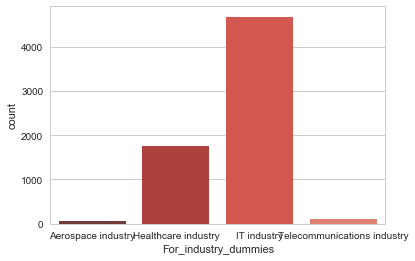

In [159]:
sns.countplot(x=check_df.columns[0], data=check_df, palette="Reds_d")

In [145]:
check_df.columns[-1]

'For_industry_dummies'

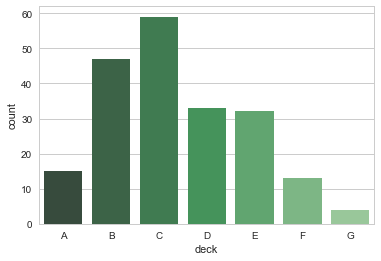

In [127]:
titanic = sns.load_dataset("titanic")
sns.countplot(x="deck", data=titanic, palette="Greens_d")

In [136]:
type(titanic['deck'])

pandas.core.series.Series